# MEI Introduction to Data Science

# Activity 4a: Exploring car data

# Table of contents
* [Introduction](#Introduction)
 - [Problem](#Problem)
 - [Importing libraries and data](#Importing-libraries-and-data)
* [Pre-processing the data](#Pre-processing-the-data)
* [Exploring the data](#Exploring-the-data)
* [Communicating the results](#Communicating-the-results)
 - [Checkpoint](#Checkpoint)


# Introduction

In Lesson 4 you explored associations between engine size, mass and emissions for different types of car. In this activity you will investigate the differences between cars made in 2002 and those made in 2016.

The activity uses the data from the AQA large data set which gives information about cars. For more information about the data see the short video at: https://mei.org.uk/introduction-to-data-science/large-data-sets/

## Problem

***How do emissions of cars made in 2016 compare to those made in 2002?***

## Importing libraries and data

> Run the code below to import the libraries and the data.

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
cars_data = pd.read_csv('/Users/olisa/Lis/data_sci/AQA-large-data-set.csv')
# check the data
cars_data

,ReferenceNumber,Make,PropulsionTypeId,BodyTypeId,GovRegion,KeeperTitleId,EngineSize,YearRegistered,Mass,CO2,CO,NOX,part,hc,Random number
0,440,VAUXHALL,1,96,London,1,1598,2002,1970,190,0.219,0.026,NaN,0.037,0.430217
1,1465,VAUXHALL,1,14,South West,5,1398,2016,1163,118,0.463,0.010,NaN,0.031,0.797111
2,3434,VOLKSWAGEN,1,14,South West,2,1395,2016,1316,113,0.242,0.033,NaN,0.048,0.348442
3,1801,VAUXHALL,1,14,South West,4,1598,2016,1355,159,0.809,0.012,NaN,0.051,0.968447
4,2330,BMW,2,13,South West,5,1995,2016,1445,114,0.180,0.023,NaN,NaN,0.178227
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3822,2920,FORD,2,14,North West,5,1997,2016,1681,122,0.145,0.059,0.001,NaN,0.946550
3823,1800,FORD,2,96,London,2,1997,2016,1833,134,0.305,0.054,NaN,NaN,0.538774
3824,3498,FORD,1,14,South West,1,999,2016,1333,108,0.447,0.030,0.002,0.076,0.736612
3825,2802,VAUXHALL,1,14,North West,5,1364,2016,1409,149,0.699,0.008,NaN,0.044,0.748846


# Pre-processing the data

Some of the data cleaning and preparation will be familiar from previous lessons.

> Run the code below to:
> * remove rows with erroneous data;
> * create a categorical feature for propulsion type.

In [4]:
# Keeping only the rows where EngineSize is greater than zero, Mass is greater than zero and CO2 is greater than zero
cleaned_cars_data = cars_data[(cars_data['EngineSize'] > 0) 
                            & (cars_data['Mass'] > 0)
                            & (cars_data['CO2'] > 0)].copy()

# create a PropulsionType feature based on the values of the PropulsionTypeID feature
cleaned_cars_data['PropulsionType'] = cars_data['PropulsionTypeId'].replace({1: 'Petrol',
                                                                             2: 'Diesel',
                                                                             3: 'Electric', 
                                                                             7: 'Gas/Petrol', 
                                                                             8: 'Electric/Petrol'})
# check the data
cleaned_cars_data

,ReferenceNumber,Make,PropulsionTypeId,BodyTypeId,GovRegion,KeeperTitleId,EngineSize,YearRegistered,Mass,CO2,CO,NOX,part,hc,Random number,PropulsionType
0,440,VAUXHALL,1,96,London,1,1598,2002,1970,190,0.219,0.026,NaN,0.037,0.430217,Petrol
1,1465,VAUXHALL,1,14,South West,5,1398,2016,1163,118,0.463,0.010,NaN,0.031,0.797111,Petrol
2,3434,VOLKSWAGEN,1,14,South West,2,1395,2016,1316,113,0.242,0.033,NaN,0.048,0.348442,Petrol
3,1801,VAUXHALL,1,14,South West,4,1598,2016,1355,159,0.809,0.012,NaN,0.051,0.968447,Petrol
4,2330,BMW,2,13,South West,5,1995,2016,1445,114,0.180,0.023,NaN,NaN,0.178227,Diesel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3822,2920,FORD,2,14,North West,5,1997,2016,1681,122,0.145,0.059,0.001,NaN,0.946550,Diesel
3823,1800,FORD,2,96,London,2,1997,2016,1833,134,0.305,0.054,NaN,NaN,0.538774,Diesel
3824,3498,FORD,1,14,South West,1,999,2016,1333,108,0.447,0.030,0.002,0.076,0.736612,Petrol
3825,2802,VAUXHALL,1,14,North West,5,1364,2016,1409,149,0.699,0.008,NaN,0.044,0.748846,Petrol


The `YearRegistered` feature is a number, but in this activity you'll use it as a _category_. The following code converts the `YearRegistered` column to text so that *Seaborn* and *Pandas* intepret it as a category.

> Run the code below to change the data type of `YearRegistered` to `category`.

In [5]:
# convert YearRegistered to text
cleaned_cars_data['YearRegistered'] = cleaned_cars_data['YearRegistered'].astype('category')

# show the data types
cleaned_cars_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3733 entries, 0 to 3826
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   ReferenceNumber   3733 non-null   int64   
 1   Make              3733 non-null   object  
 2   PropulsionTypeId  3733 non-null   int64   
 3   BodyTypeId        3733 non-null   int64   
 4   GovRegion         3733 non-null   object  
 5   KeeperTitleId     3733 non-null   int64   
 6   EngineSize        3733 non-null   int64   
 7   YearRegistered    3733 non-null   category
 8   Mass              3733 non-null   int64   
 9   CO2               3733 non-null   int64   
 10  CO                3730 non-null   float64 
 11  NOX               3731 non-null   float64 
 12  part              713 non-null    float64 
 13  hc                2390 non-null   float64 
 14  Random number     3733 non-null   float64 
 15  PropulsionType    3733 non-null   object  
dtypes: category(1), float64(5), i

# Exploring the data

To answer the problem you may wish to

* Compare the statistics for different features for 2002 cars and 2016 cars: e.g. use `groupby('YearRegistered)` and `describe` $CO_2$ emissions.
* Compare charts for different features for 2002 cars and 2016 cars: e.g. use `catplot` to create a box plot of emissions grouped by year.
* Compare the scatter plots based on two features to identify any associations: e.g. use `relplot` to create a scatter plot of emissions against mass, with the colour determined by year
* Take slices of the data: e.g. petrol cars, and see what the differences are for this type of car.

In [ ]:
# Compare the statistics for different features for 2002 cars and 2016 cars: e.g. use `groupby('YearRegistered)` and `describe` $CO_2$ emissions.

grouped_df = cleaned_cars_data.groupby('YearRegistered')

grouped_df.describe()



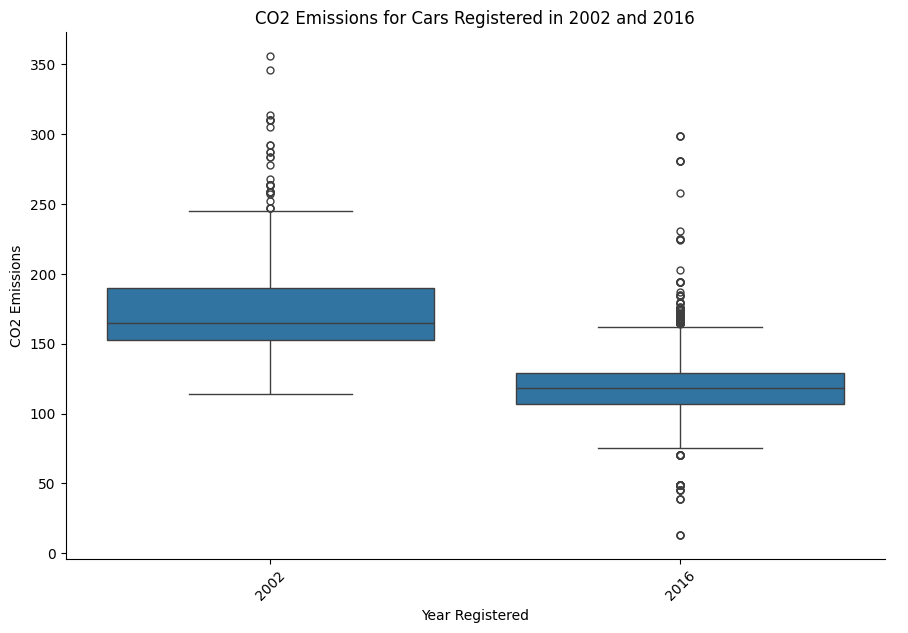

In [31]:

# Creating 2 data frames by year in order to create the box plot

cleaned_cars_data = cleaned_cars_data[(cleaned_cars_data['YearRegistered'] == 2002) | (cleaned_cars_data['YearRegistered'] == 2016)]

sns.catplot(data=cleaned_cars_data, kind='box', x='YearRegistered', y='CO2', height=6, aspect=1.5)

plt.title('CO2 Emissions for Cars Registered in 2002 and 2016')
plt.xlabel('Year Registered')
plt.ylabel('CO2 Emissions')
plt.xticks(rotation=45)  # Optional: Rotate x-tick labels for better readability
plt.show()




# Communicating the results
## Checkpoint
> Use your analysis to answer the question: ***How do emissions of cars made in 2016 compare to those made in 2002?***